# Unit 2 Lesson 1: Preparing a dataset for modeling

Using a dataset of your choice, select an outcome variable and then pick 4 or 5 other variables (1-2 categorical, 3-4 continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far. 
<br>
<br>
Next, based on what you learned via your data exploration, create 10 new features. Explain the reasoning behind each one. 
<br>
<br>
Finally, use filtering methods to select the 5 best features and justify your choices.

## Exploring The Data:

#### The dataset was manually compiled showing year-to-date statistics as of the 2018 Open Championship.  

[PGA Tour Stats Source](https://www.pgatour.com/stats.html)

In [103]:
# Import Modules.

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile
from sklearn import preprocessing

# Setting overall aesthetics
sns.set_style('white')

In [104]:
# Load dataset.

df = pd.read_csv('~/src/data/golf-stats-2018.csv', encoding='windows-1252')
df.head()

,Player_Name,Country,Rank,SG_TeeToGreen,SG_OffTheTee,DrivingDistance_AllDrives,Driving_Accuracy,Good_Drive_Percentage,SG_ApproachTheGreen,GIR_Percentage,...,SG_Putting,OnePutt_Percentage,Three_Putt_Avoidance,Putts_Per_Round,BirdieOrBetter_ConversionPercentage,SG_Total,Scoring_Average,Par3_ScoringAverage,Par4_ScoringAverage,Par5_ScoringAverage
0,Dustin Johnson,USA,1,2.036,1.036,305.1,57.67,77.97,0.763,69.31,...,0.552,38.16,1.45,28.19,38.15,2.587,68.751,2.99,3.94,4.47
1,Justin Rose,ENG,2,1.456,0.562,291.0,64.12,77.53,0.521,69.70,...,0.626,38.43,2.55,28.45,35.82,2.082,69.081,3.05,3.93,4.57
2,Justin Thomas,USA,3,1.564,0.506,302.1,57.74,78.12,0.845,68.83,...,0.256,39.27,2.97,28.41,35.84,1.821,69.415,3.08,3.97,4.50
3,Brooks Koepka,USA,4,0.469,0.446,299.0,55.26,71.48,-0.158,67.01,...,0.269,36.42,3.55,28.72,34.03,0.738,69.587,3.02,4.00,4.64
4,Jon Rahm,ESP,5,1.140,0.984,307.6,58.85,79.23,-0.036,70.37,...,0.204,38.64,2.90,28.79,37.36,1.345,70.117,3.10,3.96,4.55


In [105]:
df.dtypes

Player_Name                             object
Country                                 object
Rank                                     int64
SG_TeeToGreen                          float64
SG_OffTheTee                           float64
DrivingDistance_AllDrives              float64
Driving_Accuracy                       float64
Good_Drive_Percentage                  float64
SG_ApproachTheGreen                    float64
GIR_Percentage                         float64
GIR_Percentage_FromFairway             float64
GIR_Percentage_FromFairwayBunker       float64
GIR_Percentage_OtherThanFairway        float64
Fairway_Proximity                       object
Proximity_To_Hole                       object
SG_AroundTheGreen                      float64
Sand_Save_Percentage                   float64
Scrambling                             float64
Scrambling_FromTheSand                 float64
Scrambling_FromTheRough                float64
Scrambling_Other                       float64
Proximity_ARG

In [106]:
# The dataset includes the top 1000 ranked players. However, statistics are only measured for
# top ~200 players within each category. Additionally, there were 33 player rows with either/or 
# 'Player_Name' & 'Country' missing from the website. These 33 players were omitted from the dataset. 
print(len(df))
df.isnull().sum()

967


Player_Name                              0
Country                                  0
Rank                                     0
SG_TeeToGreen                          764
SG_OffTheTee                           764
DrivingDistance_AllDrives              764
Driving_Accuracy                       764
Good_Drive_Percentage                  764
SG_ApproachTheGreen                    764
GIR_Percentage                         764
GIR_Percentage_FromFairway             766
GIR_Percentage_FromFairwayBunker       764
GIR_Percentage_OtherThanFairway        764
Fairway_Proximity                      764
Proximity_To_Hole                      764
SG_AroundTheGreen                      764
Sand_Save_Percentage                   764
Scrambling                             764
Scrambling_FromTheSand                 764
Scrambling_FromTheRough                764
Scrambling_Other                       764
Proximity_ARG                          764
SG_Putting                             764
OnePutt_Per

In [107]:
# For analysis, we will drop the rows (players) where at least one element is missing.
df = df.dropna(axis='rows')
print(len(df))
df.isnull().sum()

201


Player_Name                            0
Country                                0
Rank                                   0
SG_TeeToGreen                          0
SG_OffTheTee                           0
DrivingDistance_AllDrives              0
Driving_Accuracy                       0
Good_Drive_Percentage                  0
SG_ApproachTheGreen                    0
GIR_Percentage                         0
GIR_Percentage_FromFairway             0
GIR_Percentage_FromFairwayBunker       0
GIR_Percentage_OtherThanFairway        0
Fairway_Proximity                      0
Proximity_To_Hole                      0
SG_AroundTheGreen                      0
Sand_Save_Percentage                   0
Scrambling                             0
Scrambling_FromTheSand                 0
Scrambling_FromTheRough                0
Scrambling_Other                       0
Proximity_ARG                          0
SG_Putting                             0
OnePutt_Percentage                     0
Three_Putt_Avoid

In [108]:
df.columns

Index(['Player_Name', 'Country', 'Rank', 'SG_TeeToGreen', 'SG_OffTheTee',
       'DrivingDistance_AllDrives', 'Driving_Accuracy',
       'Good_Drive_Percentage', 'SG_ApproachTheGreen', 'GIR_Percentage',
       'GIR_Percentage_FromFairway', 'GIR_Percentage_FromFairwayBunker',
       'GIR_Percentage_OtherThanFairway', 'Fairway_Proximity',
       'Proximity_To_Hole', 'SG_AroundTheGreen', 'Sand_Save_Percentage',
       'Scrambling', 'Scrambling_FromTheSand', 'Scrambling_FromTheRough',
       'Scrambling_Other', 'Proximity_ARG', 'SG_Putting', 'OnePutt_Percentage',
       'Three_Putt_Avoidance', 'Putts_Per_Round',
       'BirdieOrBetter_ConversionPercentage', 'SG_Total', 'Scoring_Average',
       'Par3_ScoringAverage', 'Par4_ScoringAverage', 'Par5_ScoringAverage'],
      dtype='object')

In [109]:
# Classify the players into 2 groups: US & World.

df['world_group'] = (df['Country'].map(lambda x: 'USA' if x == 'USA' else 'World'))
df.head()

,Player_Name,Country,Rank,SG_TeeToGreen,SG_OffTheTee,DrivingDistance_AllDrives,Driving_Accuracy,Good_Drive_Percentage,SG_ApproachTheGreen,GIR_Percentage,...,OnePutt_Percentage,Three_Putt_Avoidance,Putts_Per_Round,BirdieOrBetter_ConversionPercentage,SG_Total,Scoring_Average,Par3_ScoringAverage,Par4_ScoringAverage,Par5_ScoringAverage,world_group
0,Dustin Johnson,USA,1,2.036,1.036,305.1,57.67,77.97,0.763,69.31,...,38.16,1.45,28.19,38.15,2.587,68.751,2.99,3.94,4.47,USA
1,Justin Rose,ENG,2,1.456,0.562,291.0,64.12,77.53,0.521,69.70,...,38.43,2.55,28.45,35.82,2.082,69.081,3.05,3.93,4.57,World
2,Justin Thomas,USA,3,1.564,0.506,302.1,57.74,78.12,0.845,68.83,...,39.27,2.97,28.41,35.84,1.821,69.415,3.08,3.97,4.50,USA
3,Brooks Koepka,USA,4,0.469,0.446,299.0,55.26,71.48,-0.158,67.01,...,36.42,3.55,28.72,34.03,0.738,69.587,3.02,4.00,4.64,USA
4,Jon Rahm,ESP,5,1.140,0.984,307.6,58.85,79.23,-0.036,70.37,...,38.64,2.90,28.79,37.36,1.345,70.117,3.10,3.96,4.55,World


In [110]:
df_keep = df[['world_group', 'SG_TeeToGreen', 'SG_OffTheTee',
               'SG_ApproachTheGreen', 'SG_AroundTheGreen', 'SG_Putting',
               'SG_Total']]
#df_keep.columns
df_keep.head()

,world_group,SG_TeeToGreen,SG_OffTheTee,SG_ApproachTheGreen,SG_AroundTheGreen,SG_Putting,SG_Total
0,USA,2.036,1.036,0.763,0.237,0.552,2.587
1,World,1.456,0.562,0.521,0.373,0.626,2.082
2,USA,1.564,0.506,0.845,0.213,0.256,1.821
3,USA,0.469,0.446,-0.158,0.181,0.269,0.738
4,World,1.140,0.984,-0.036,0.193,0.204,1.345


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


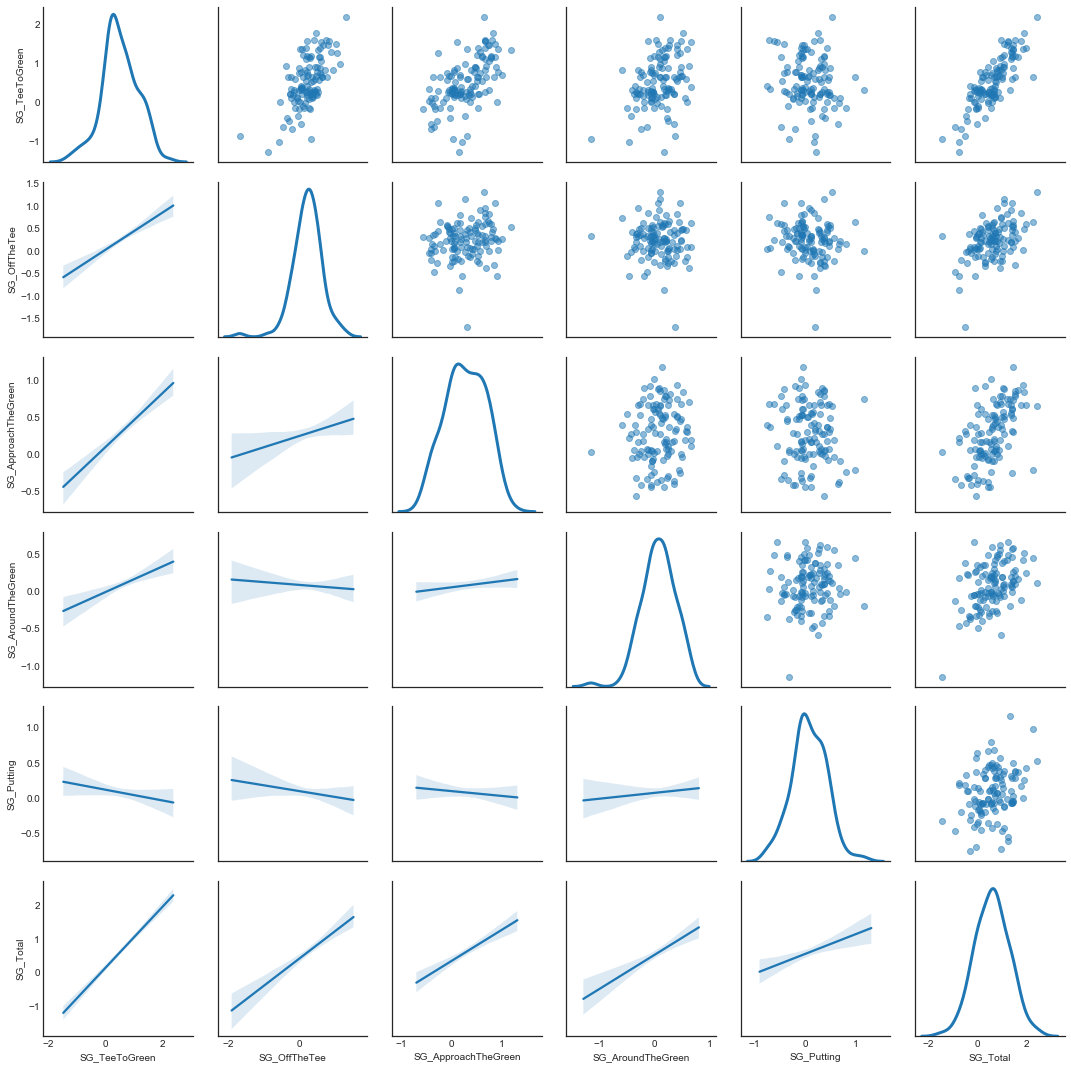

In [111]:
# Make a copy of the data to add jitter to and plot. 
df_jittered = df_keep.loc[:, 'SG_TeeToGreen':'SG_Total'].dropna()

# Making random noise.
jitter = pd.DataFrame(np.random.uniform(-.3, .3, size=(df_jittered.shape)),
                      columns=df_jittered.columns)

# Cominbe the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=0.5)
# Fit line summarizing the linear relationship of the 2 variables
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()
# Some warnings will show up because the plot doesn't include a lenged.

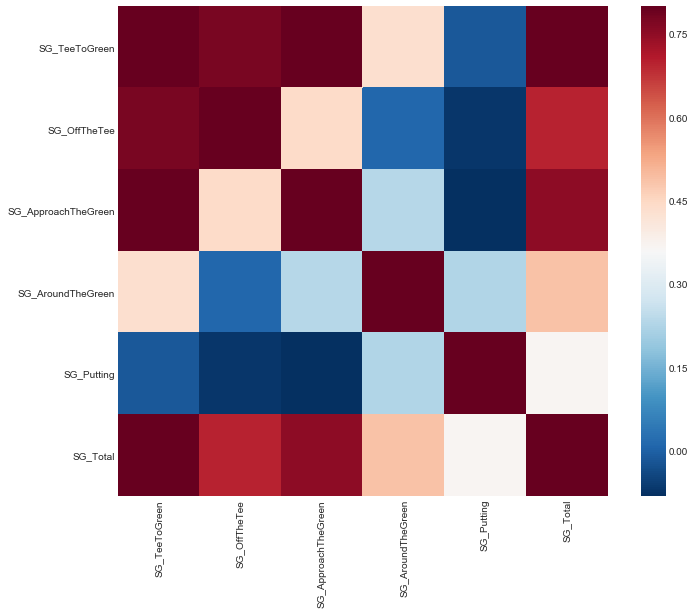

In [112]:
# Make the correlation matrix. 
corrmat = df_keep.corr()
#print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn. 
sns.heatmap(corrmat, vmax=.8, square=True, cmap='RdBu_r')
plt.show()

In [113]:
df_keep.head()

,world_group,SG_TeeToGreen,SG_OffTheTee,SG_ApproachTheGreen,SG_AroundTheGreen,SG_Putting,SG_Total
0,USA,2.036,1.036,0.763,0.237,0.552,2.587
1,World,1.456,0.562,0.521,0.373,0.626,2.082
2,USA,1.564,0.506,0.845,0.213,0.256,1.821
3,USA,0.469,0.446,-0.158,0.181,0.269,0.738
4,World,1.140,0.984,-0.036,0.193,0.204,1.345


c:\python\python36\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


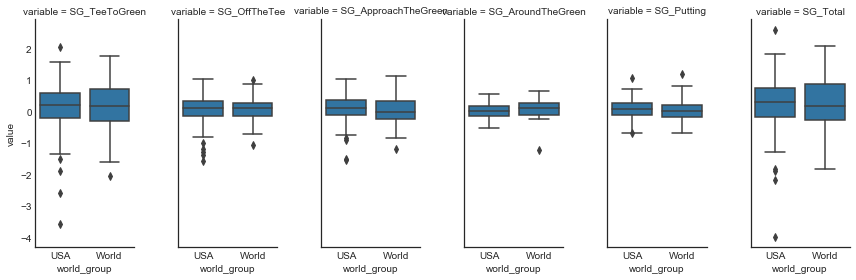

            SG_ApproachTheGreen                                              \
                          count      mean       std    min      25%     50%   
world_group                                                                   
USA                       137.0  0.095533  0.413853 -1.539 -0.11600  0.0930   
World                      64.0  0.021344  0.448200 -1.192 -0.24425 -0.0205   

                           SG_AroundTheGreen            ...   SG_TeeToGreen  \
                75%    max             count      mean  ...             75%   
world_group                                             ...                   
USA          0.3520  1.016             137.0  0.016635  ...         0.56600   
World        0.3185  1.112              64.0  0.080688  ...         0.71025   

                   SG_Total                                             \
               max    count      mean       std    min     25%     50%   
world_group                                                 

In [114]:
# Restructure the data so we can use FacetGrid rather than making a boxplot for each variable sep.
df_long = df_keep
df_long = pd.melt(df_long, id_vars=['world_group'])
g = sns.FacetGrid(df_long, col='variable', size=4, aspect=.5)
g = g.map(sns.boxplot, 'world_group', 'value')
plt.show()

# Descriptive statistics by group.
print(df_keep.groupby('world_group').describe())

# Test whether group differences are significant.
for col in df_keep.loc[:, 'SG_TeeToGreen': 'SG_Total'].columns:
    print(col)
    print(stats.ttest_ind(df_keep[df_keep['world_group'] == 'USA'][col].dropna(),
                          df_keep[df_keep['world_group'] == 'World'][col].dropna()))

## Feature Engineering

In [115]:
df.columns

Index(['Player_Name', 'Country', 'Rank', 'SG_TeeToGreen', 'SG_OffTheTee',
       'DrivingDistance_AllDrives', 'Driving_Accuracy',
       'Good_Drive_Percentage', 'SG_ApproachTheGreen', 'GIR_Percentage',
       'GIR_Percentage_FromFairway', 'GIR_Percentage_FromFairwayBunker',
       'GIR_Percentage_OtherThanFairway', 'Fairway_Proximity',
       'Proximity_To_Hole', 'SG_AroundTheGreen', 'Sand_Save_Percentage',
       'Scrambling', 'Scrambling_FromTheSand', 'Scrambling_FromTheRough',
       'Scrambling_Other', 'Proximity_ARG', 'SG_Putting', 'OnePutt_Percentage',
       'Three_Putt_Avoidance', 'Putts_Per_Round',
       'BirdieOrBetter_ConversionPercentage', 'SG_Total', 'Scoring_Average',
       'Par3_ScoringAverage', 'Par4_ScoringAverage', 'Par5_ScoringAverage',
       'world_group'],
      dtype='object')

In [116]:
df1 = df[['Player_Name', 'Country', 'world_group', 'Rank', 'SG_TeeToGreen', 'SG_OffTheTee',
               'SG_ApproachTheGreen', 'SG_AroundTheGreen', 'SG_Putting',
               'SG_Total']]

df1.head()

,Player_Name,Country,world_group,Rank,SG_TeeToGreen,SG_OffTheTee,SG_ApproachTheGreen,SG_AroundTheGreen,SG_Putting,SG_Total
0,Dustin Johnson,USA,USA,1,2.036,1.036,0.763,0.237,0.552,2.587
1,Justin Rose,ENG,World,2,1.456,0.562,0.521,0.373,0.626,2.082
2,Justin Thomas,USA,USA,3,1.564,0.506,0.845,0.213,0.256,1.821
3,Brooks Koepka,USA,USA,4,0.469,0.446,-0.158,0.181,0.269,0.738
4,Jon Rahm,ESP,World,5,1.140,0.984,-0.036,0.193,0.204,1.345


In [117]:
print(df1.Country.unique())

['USA' 'ENG' 'ESP' 'ITA' 'NIR' 'AUS' 'SWE' 'JPN' 'THA' 'RSA' 'KOR' 'SCO'
 'CAN' 'ARG' 'BEL' 'VEN' 'IRL' 'IND' 'NZL' 'MEX' 'TPE' 'GER' 'CHN' 'COL']


In [118]:
# Making dummies.
# Also creating a dataframe to hold our features.

features = pd.get_dummies(df1['Country'])

# European countries dummy.
features['Euro'] = np.where((df1['Country'].isin(['ENG', 'ESP', 'ITA', 'NIR', 'SWE', 'SCO',
                                                 'BEL', 'IRL', 'GER'])), 1, 0)

print(pd.crosstab(features['Euro'], df1['Country']))

Country  ARG  AUS  BEL  CAN  CHN  COL  ENG  ESP  GER  IND ...   MEX  NIR  NZL  \
Euro                                                      ...                   
0          2   10    0    6    2    1    0    0    0    1 ...     2    0    1   
1          0    0    1    0    0    0    5    2    2    0 ...     0    2    0   

Country  RSA  SCO  SWE  THA  TPE  USA  VEN  
Euro                                        
0          7    0    0    1    1  137    1  
1          0    2    4    0    0    0    0  

[2 rows x 24 columns]


In [119]:
# Compare top 20 ranked players with the rest.
features['Top_20'] = np.where(df1['Rank']<=20, 1, 0)

# Check to make sure it worked.
print(df1['Rank'].groupby(features['Top_20']).describe())

        count        mean         std   min   25%    50%     75%    max
Top_20                                                                 
0       182.0  229.978022  183.394330  21.0  79.5  181.0  333.75  801.0
1        19.0   10.000000    5.627314   1.0   5.5   10.0   14.50   19.0


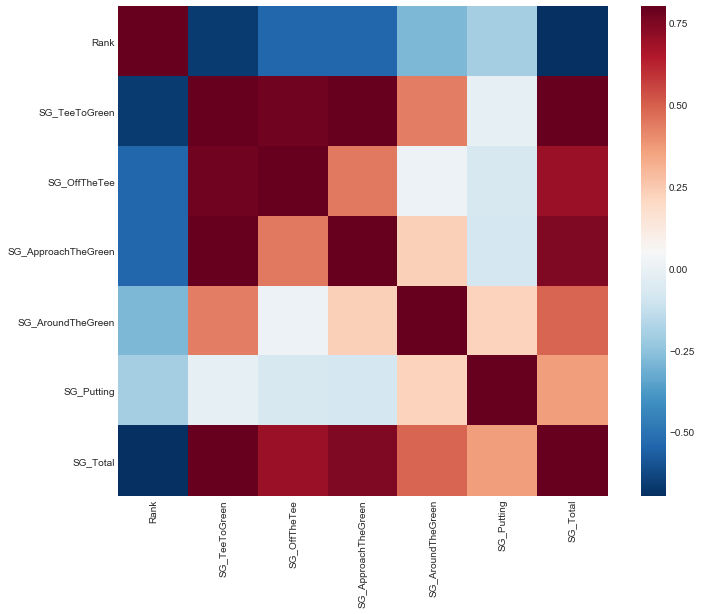

                     SG_TeeToGreen  SG_OffTheTee  SG_ApproachTheGreen  \
SG_TeeToGreen             1.000000      0.779261             0.842305   
SG_OffTheTee              0.779261      1.000000             0.444551   
SG_ApproachTheGreen       0.842305      0.444551             1.000000   
SG_Total                  0.925308      0.698023             0.752652   
composite                 0.988137      0.814005             0.846788   

                     SG_Total  composite  
SG_TeeToGreen        0.925308   0.988137  
SG_OffTheTee         0.698023   0.814005  
SG_ApproachTheGreen  0.752652   0.846788  
SG_Total             1.000000   0.940528  
composite            0.940528   1.000000  


In [120]:
corrmat = df1.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True, cmap='RdBu_r')
plt.show()

# SG_TeeToGreen, SG_OffTheTee, SG_ApproachTheGreen, SG_Total 
means = df1[['SG_TeeToGreen', 'SG_OffTheTee', 'SG_ApproachTheGreen', 'SG_Total']].mean(axis=0)
stds = df1[['SG_TeeToGreen', 'SG_OffTheTee', 'SG_ApproachTheGreen', 'SG_Total']].std(axis=0)
features['composite'] = ((df[['SG_TeeToGreen', 'SG_OffTheTee', 'SG_ApproachTheGreen',
                              'SG_Total']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = df1.loc[:, ['SG_TeeToGreen', 'SG_OffTheTee', 'SG_ApproachTheGreen', 'SG_Total']]
plotdf['composite'] = features['composite']
corrmat2 = plotdf.corr()

print(corrmat2)

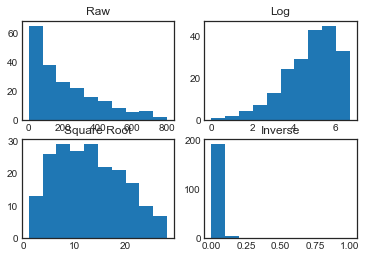

In [121]:
# Making a 4-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df1['Rank'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df1['Rank'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df1['Rank'].dropna()))
plt.title('Square Root')

ax3 = fig.add_subplot(224)
plt.hist(1/df1['Rank'].dropna())
plt.title('Inverse')
plt.show()

features['log_Rank'] = np.log(df1['Rank'])

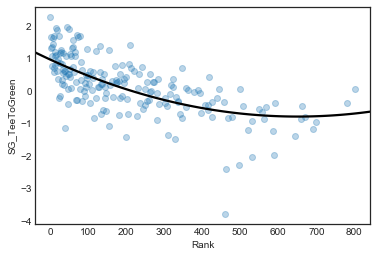

In [122]:
sns.regplot(df1['Rank'], y=df1['SG_TeeToGreen'], y_jitter=.49, order=2, scatter_kws={'alpha':0.3},
            line_kws={'color':'black'}, ci=None)
plt.show()

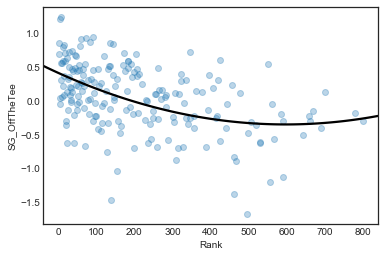

In [123]:
sns.regplot(df1['Rank'], y=df1['SG_OffTheTee'], y_jitter=.49, order=2, scatter_kws={'alpha':0.3},
            line_kws={'color':'black'}, ci=None)
plt.show()

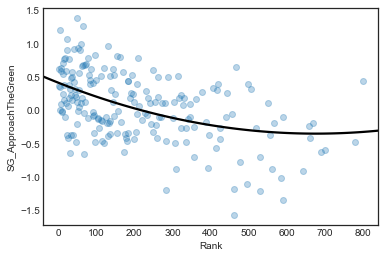

In [124]:
sns.regplot(df1['Rank'], y=df1['SG_ApproachTheGreen'], y_jitter=.49, order=2,
            scatter_kws={'alpha':0.3}, line_kws={'color':'black'}, ci=None)
plt.show()

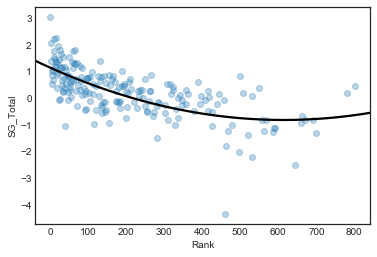

In [125]:
sns.regplot(df1['Rank'], y=df1['SG_Total'], y_jitter=.49, order=2, scatter_kws={'alpha':0.3},
            line_kws={'color':'black'}, ci=None)
plt.show()

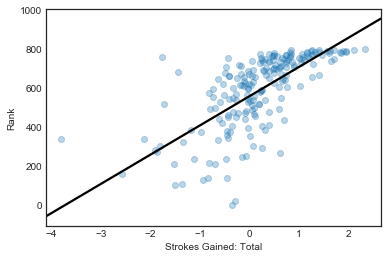

In [126]:
# Reverse-coding the 'Rank' variable so that higher rank value means better player. This is to
# reverse the data where the top player's rank == 1. 

features['RanksRefit'] = max(df1['Rank']) - df1['Rank']

sns.regplot(df1['SG_Total'], features['RanksRefit'], x_jitter=.49, y_jitter=.49,
            scatter_kws={'alpha':0.3}, line_kws={'color':'black'}, ci=None)

plt.xlabel('Strokes Gained: Total')
plt.ylabel('Rank')
plt.show()

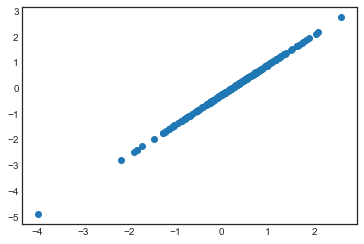

               Rank  SG_TeeToGreen  SG_OffTheTee  SG_ApproachTheGreen  \
count  2.010000e+02   2.010000e+02  2.010000e+02         2.010000e+02   
mean   7.070077e-17   3.535038e-17 -3.535038e-17        -3.535038e-17   
std    1.002497e+00   1.002497e+00  1.002497e+00         1.002497e+00   
min   -1.121939e+00  -4.689562e+00 -3.793329e+00        -3.796480e+00   
25%   -8.309242e-01  -4.920194e-01 -4.778250e-01        -5.418367e-01   
50%   -2.973964e-01   5.788243e-02  1.072640e-01        -4.456681e-02   
75%    5.810383e-01   5.852370e-01  6.366302e-01         6.341712e-01   
max    3.189397e+00   2.352689e+00  2.292061e+00         2.451210e+00   

       SG_AroundTheGreen    SG_Putting      SG_Total  
count       2.010000e+02  2.010000e+02  2.010000e+02  
mean        7.070077e-17 -5.302558e-17 -3.535038e-17  
std         1.002497e+00  1.002497e+00  1.002497e+00  
min        -5.267988e+00 -2.294163e+00 -4.892127e+00  
25%        -7.008563e-01 -5.983244e-01 -5.259895e-01  
50%        -

In [127]:
# Select only numberic variables to scale.
df_num = df1.select_dtypes(include=[np.number]).dropna()
# Save the column names.
names = df_num.columns
# Scale, then turn the resulting numpy array back into a dataframe with the correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)
# The new features containallthe information ofthe oldones, but on a new scale.
plt.scatter(df_num['SG_Total'], df_scaled['SG_Total'])
plt.show()

print(df_scaled.describe())

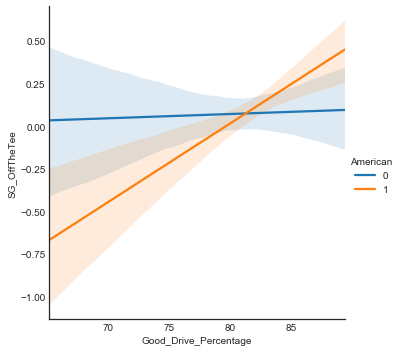

In [130]:
features['Good_Drive_Percentage'] = df['Good_Drive_Percentage']
features['SG_OffTheTee'] = df['SG_OffTheTee']
features['American'] = np.where(df1['world_group'] == 'USA', 1, 0)
sns.lmplot(x='Good_Drive_Percentage', y='SG_OffTheTee', hue='American', data=features,
           scatter=False)
plt.show()

## Principal Components Analysis

In [133]:
df_pca = df1

In [132]:
#'SG_TeeToGreen', 'SG_OffTheTee', 'SG_ApproachTheGreen', 'SG_AroundTheGreen', 'SG_Putting', 'SG_Total'

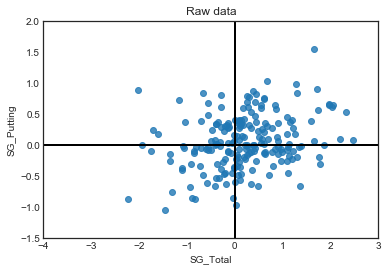

In [150]:
t = sns.regplot('SG_Total', 'SG_Putting', df_pca, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.set(xlim=(-4, 3), ylim=(-1.5, 2))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

c:\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


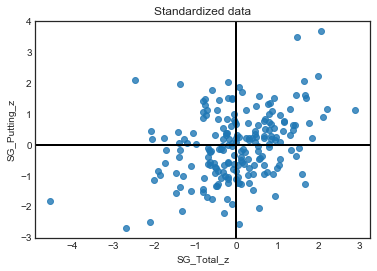

In [153]:
# Standardizing variables by subtracting the mean and dividing by the standard deviation.
# Now both variables are on the same scale.

df_pca['SG_Total_z'] = (df_pca['SG_Total'] - df_pca['SG_Total'].mean()) / df_pca['SG_Total'].std()
df_pca['SG_Putting_z'] = (df_pca['SG_Putting'] -
                          df_pca['SG_Putting'].mean()) / df_pca['SG_Putting'].std()

t = sns.regplot('SG_Total_z', 'SG_Putting_z', df_pca, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

c:\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


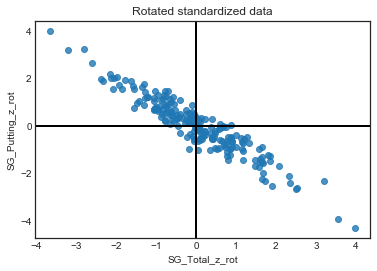

In [154]:
df_pca['SG_Total_z_rot'] = math.cos(40) * df_pca['SG_Total_z'] - math.sin(40) * df_pca['SG_Putting_z']
df_pca['SG_Putting_z_rot'] = math.sin(40) * df_pca['SG_Total_z'] - math.cos(40) * df_pca['SG_Putting_z']

t = sns.regplot('SG_Total_z_rot', 'SG_Putting_z_rot', df_pca, x_jitter=.49, y_jitter=.49,
                fit_reg=False)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()

In [158]:
df1.head()

,Player_Name,Country,world_group,Rank,SG_TeeToGreen,SG_OffTheTee,SG_ApproachTheGreen,SG_AroundTheGreen,SG_Putting,SG_Total,SG_Total_z,SG_Putting_z,SG_Total_z_rot,SG_Putting_z_rot
0,Dustin Johnson,USA,USA,1,2.036,1.036,0.763,0.237,0.552,2.587,2.755712,1.514619,-2.966452,3.063475
1,Justin Rose,ENG,World,2,1.456,0.562,0.521,0.373,0.626,2.082,2.168890,1.741394,-2.744051,2.777470
2,Justin Thomas,USA,USA,3,1.564,0.506,0.845,0.213,0.256,1.821,1.865602,0.607522,-1.696914,1.795264
3,Brooks Koepka,USA,USA,4,0.469,0.446,-0.158,0.181,0.269,0.738,0.607131,0.647361,-0.887276,0.884131
4,Jon Rahm,ESP,World,5,1.140,0.984,-0.036,0.193,0.204,1.345,1.312479,0.448167,-1.209277,1.276845


In [162]:
df_pca = df1[['SG_TeeToGreen','SG_OffTheTee','SG_ApproachTheGreen',
                'SG_AroundTheGreen','SG_Putting','SG_Total']]
df_pca.head()

# Normalize the data so that all variables have a mean of 0 and std dev of 1.

X = StandardScaler().fit_transform(df_pca)

Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.005       0.78315763  0.84651679  0.43634845 -0.01256801  0.9299349 ]
 [ 0.78315763  1.005       0.44677422  0.01152637 -0.07078859  0.70151273]
 [ 0.84651679  0.44677422  1.005       0.23479923 -0.08153268  0.75641558]
 [ 0.43634845  0.01152637  0.23479923  1.005       0.2269899   0.4918856 ]
 [-0.01256801 -0.07078859 -0.08153268  0.2269899   1.005       0.36945216]
 [ 0.9299349   0.70151273  0.75641558  0.4918856   0.36945216  1.005     ]]


In [ ]:
# Calculating eigenvalues and eigenvectors.



## Feature Selection